# Importing Needed packages
 원 예제와는 다르게, requests를 import했다. wget이 제대로 작동하지 않아서 대체하기 위함.

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import requests
%matplotlib inline

# Download data
 url에서 csv를 다운로드 받는다. url에서 내용을 다운로드 -> 내용만 복사 -> 로컬 csv파일에 저장한다.
 csv.write()와 csv.close()는 항상 세트로 다니는 것을 잊지말 것.

In [6]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
req = requests.get(url)
url_content = req.content
csv_file = open('FuelConsumption.csv','wb')
csv_file.write(url_content)
csv_file.close()


Instead of 'wget' used request

# Reading the data
판다스를 이용해서 데이터를 가져온다.

In [7]:
df = pd.read_csv("./FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## 원하는 column값만 가져오기
 판다스에서 지원하는 내용인 것 같다. df[[]] (list in list)구조라는 것을 명심해야겠다.
 df.head(n)을 이용해서 n만큼의 데이터만 보여주는 기능이 보인다.

In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


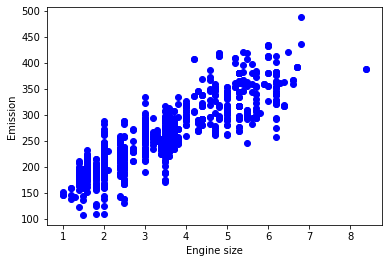

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [10]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

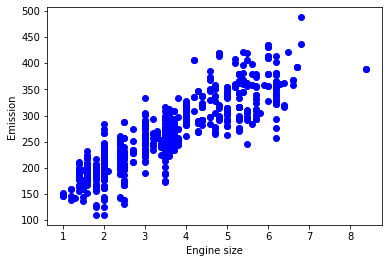

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[10.5563428   7.68838004  9.72437359]]


Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

$$y = b + \theta_1  x + \theta_2 x^2$$

Now, the question is: how we can fit our data on this equation while we have only x values, such as **Engine Size**? 
Well, we can create a few additional features: 1, $x$, and $x^2$.

**PolynomialFeatures()** function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 


In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).   

The equation and the sample example is displayed below.   

$$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$$

$$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$$


It looks like feature sets for multiple linear regression analysis, right? Yes. It Does. 
Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x_1$, $x_1^2$ with $x_2$, and so on. Then the degree 2 equation would be turn into:

$$y = b + \theta_1  x_1 + \theta_2 x_2$$

Now, we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such a problems. 

so we can use **LinearRegression()** function to solve it:


In [17]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         49.33215208 -1.32635646]]
Intercept:  [108.70914843]


As mentioned before, **Coefficient** and **Intercept** , are the parameters of the fit curvy line. 
Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:


Text(0, 0.5, 'Emission')

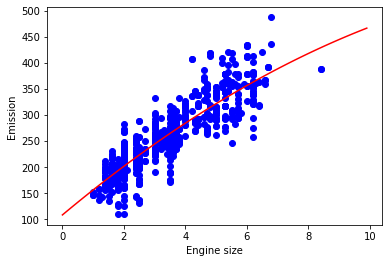

In [21]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")